In [1]:
import numpy as np
from data_analysis_codes.tools import EdS
evo = EdS.evo()
import matplotlib.pyplot as plt
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)
plt.rcParams['text.usetex'] = True

In [2]:
deltaIN = 0.03
tIN = 1
RIN = 1821/128

VolIN = 4*np.pi*(RIN**3)/3
rhoIN = evo.rho(tIN)*(deltaIN+1)
M = rhoIN*VolIN

deltaTA = 1.06
anTA = deltaTA/deltaIN
tTA = tIN*(anTA)**(3/2)
RTA = (8*evo.G*M*(tTA**2)/np.pi**2)**(1/3)

etaIN = np.arccos(1-2*RIN/RTA)
eta = np.arange(0, 2*np.pi, 0.1)

R = RTA*(1-np.cos(eta))/2
t = tTA*(eta-np.sin(eta))/np.pi

Vol = 4*np.pi*(R**3)/3
rho = M/Vol
delta = rho/evo.rho(t)-1
#delta1 = deltaIN * (t / tIN)**(2/3)
delta1 = (3/5) * (((3/4)*(eta-np.sin(eta)))**(2/3))

/Users/robynmunoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/robynmunoz/mycodes_23May2023/sphecollapse_sim_notebooks/Jupyter_notebooks/data_analysis_codes/tools/EdS.py:24: RuntimeWarning: divide by zero encountered in true_divide
  return self.Hprop_today * self.t_today / t
/Users/robynmunoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


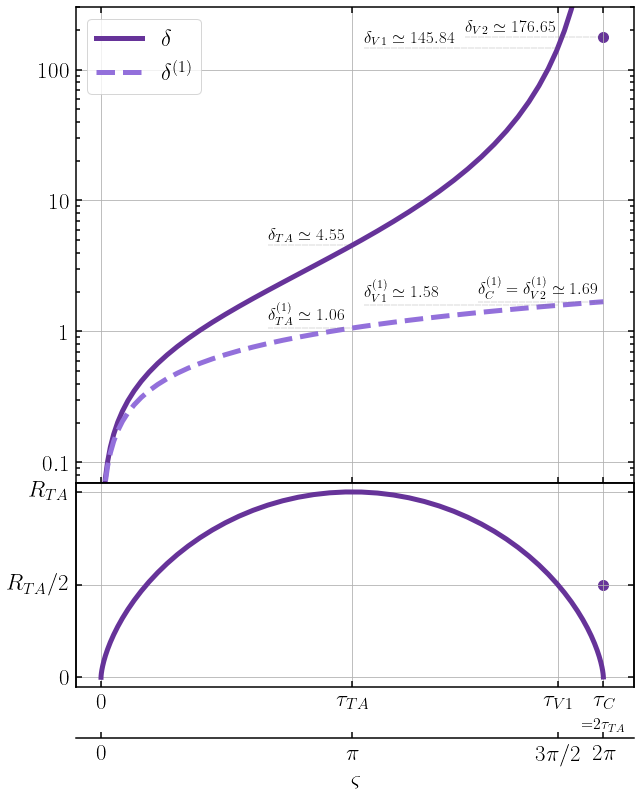

In [11]:
fontsize = 23
tfontsize = 17
lw = 5
c1 = 'rebeccapurple'
c2 = 'mediumpurple'
ss = 100
pad = 1

d1TA = 3*(6*np.pi)**(2/3)/20
d1V1 = 3*(9*np.pi+6)**(2/3)/20
d1C = 3*(12*np.pi)**(2/3)/20
dTA = 9*np.pi**2/16 - 1
dV1 = 9*(2+3*np.pi)**2/8 - 1
dV2 = 18*np.pi**2 - 1

tV1 = tTA*((3*np.pi/2)-np.sin(3*np.pi/2))/np.pi
tC = 2*tTA
xtickslocs = [0, 
              tTA, 
              tV1, 
              tC]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,12.5), gridspec_kw={'height_ratios': [3.5, 1.5]})

#================= ax1
ax1.semilogy(t, delta, linewidth=lw, color=c1, label=r'$\delta$')
ax1.scatter(2*tTA, 18*np.pi**2 - 1, color=c1, s=ss)
ax1.semilogy(t, delta1, '--', linewidth=lw, color=c2, label=r'$\delta^{(1)}$')

va = 'bottom'
xmin, xmax = ax1.set_xlim()
ls = (5, (25, 3))
nlw = lw*0.05
nxmax = xmax-pad
c3 = 'dimgray'
ax1.plot([tTA-70, tTA], 2*[d1TA], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(tTA-70, d1TA, r'$\delta^{(1)}_{TA}\simeq 1.06$', fontsize = tfontsize, va=va)
ax1.plot([tTA+10, tV1], 2*[d1V1], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(tTA+10, d1V1, r'$\delta^{(1)}_{V1}\simeq 1.58$', fontsize = tfontsize, va=va)
ax1.plot([1.5*tTA, tC], 2*[d1C], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(1.5*tTA, d1C, r'$\delta^{(1)}_{C}=\delta^{(1)}_{V2}\simeq 1.69$', fontsize = tfontsize, va=va)
ax1.plot([tTA-70, tTA], 2*[dTA], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(tTA-70, dTA, r'$\delta_{TA}\simeq 4.55$', fontsize = tfontsize, va=va)
ax1.plot([tTA+10, tV1], 2*[dV1], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(tTA+10, dV1, r'$\delta_{V1}\simeq 145.84$', fontsize = tfontsize, va=va)
ax1.plot([1.45*tTA, tC], 2*[dV2], color=c3, linestyle=ls, linewidth=nlw)
ax1.text(1.45*tTA, dV2, r'$\delta_{V2}\simeq 176.65$', fontsize = tfontsize, va=va)

ax1.grid()
ax1.set_xticks(xtickslocs)
ax1.set_xticklabels(['']*len(xtickslocs))
ax1.set_yticks([0.1,1,10,100])
ax1.set_yticklabels([r'$0.1$', r'$1$', r'$10$', r'$100$'])
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.set_ylim(7e-2, 3e2)
ax1.set_xlim(xmin, xmax)
ax1.legend(fontsize=fontsize)

#================= ax2
ax2.plot(t, R, linewidth=lw, color=c1)
ax2.scatter(t[-1], RTA/2, color=c1, s=ss)
ax2.grid()
ax2.set_yticks([0, RTA/2, RTA])
ax2.set_yticklabels([r'$0$', r'$R_{TA}/2$', r'$R_{TA}$'])
ax2.set_xticks(xtickslocs)
ax2.set_xticklabels([r'$0$', r'$\tau_{TA}$', r'$\tau_{V1}$', r'$\tau_{C}$'+'\n'+r'${}_{=2\tau_{TA}}$'])
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax22 = ax2.twiny()
ax22.set_xlim(ax2.get_xlim())
ax22.set_xticks(xtickslocs)
ax22.set_xticklabels([r'$0$', 
                     r'$\pi$', 
                     r'$3\pi/2$', 
                     r'$2\pi$'])
ax22.set_xlabel(r'$\varsigma$', fontsize=fontsize)
ax22.xaxis.set_ticks_position("bottom")
ax22.xaxis.set_label_position("bottom")
ax22.spines["bottom"].set_position(("axes", -0.25))
ax22.tick_params(axis='both', which='major', labelsize=fontsize)

fig.subplots_adjust(hspace=0)
fig.savefig('TopHat.pdf',bbox_inches='tight')

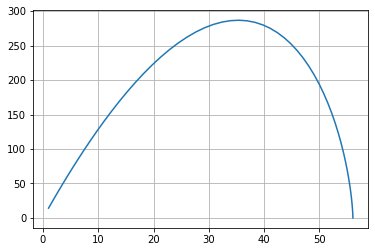

In [10]:
plt.plot(evo.a(t)/evo.a(tIN), R)
plt.grid()

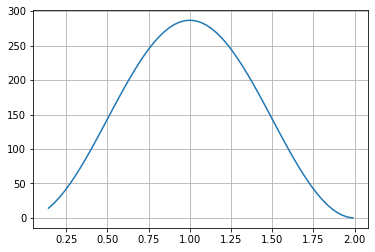

In [21]:
plt.plot(eta/np.pi, R)
plt.grid()

(0.0, 200.0)

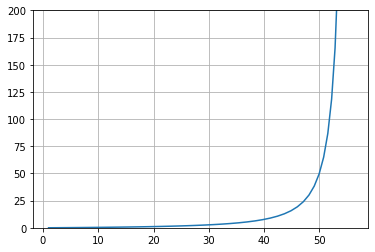

In [14]:
plt.plot(evo.a(t)/evo.a(tIN), delta)
plt.grid()
plt.ylim(0, 200)

In [16]:
# Virialisation A
eta = 3*np.pi/2
R = RTA*(1-np.cos(eta))/2
t = tTA*(eta-np.sin(eta))/np.pi
an = evo.a(t)/evo.a(tIN)
Vol = 4*np.pi*(R**3)/3
rho = M/Vol
delta = rho/evo.rho(t)-1
book_val = (9*np.pi + 6)**2 / 8 - 1
print(an, delta, book_val)

52.63765628482871 145.841245384492 145.841245384492


In [18]:
# Virialisation A
eta = 2*np.pi
R = RTA*(1-np.cos(eta))/2
t = tTA*(eta-np.sin(eta))/np.pi
an = evo.a(t)/evo.a(tIN)
Vol = 4*np.pi*(R**3)/3
print(an)

56.08817050287638
